Importing essential functions.

In [7]:
from navicat_mikimo.plot_function import plot_3d_np, plot_2d_combo, plot_3d_contour_regions_np
import numpy as np
import h5py

### Figure 4. Rh-catalyzed hydroformylation

- Catalyst-temperature map

In [5]:
# read h5 files 
filename = "data/hf/data_tv_t.h5"
with h5py.File(filename, 'r') as f:
    group = f['data']
    xint = group['xint'][:]
    t_points = group['t_points'][:]
    grid_d = group['grid'][:]
    tag = group['tag'][:]
    x1label = group['x1label'][:]
    x2label = group['x2label'][:]

#------------------------------------------------------------
 
tag = "INT4L"
x1label = "$ΔG_{RRS}$" + f"({tag}) [kcal/mol]"
x2label = "Temperature [K]"
x1base=20
x2base=20

sfilename = "HaT_selectivity_map_hf.png"
prod = ["L", "B"]
slabel = "$log_{10}$" + f"({prod[0]}/{prod[1]})"
min_ratio = -3
max_ratio = 3
selectivity_ratio = np.log10(grid_d[0] / grid_d[1])
selectivity_ratio_ = np.clip(
    selectivity_ratio, min_ratio, max_ratio)
selectivity_ratio_ = np.nan_to_num(
    selectivity_ratio_, nan=-3, posinf=3, neginf=-3)

plot_3d_np(
    xint,
    t_points,
    selectivity_ratio_.T,
    -3,
    3,
    xint.min(),
    xint.max(),
    t_points.min(),
    t_points.max(),
    x1base,
    x2base,
    x1label,
    x2label,
    slabel,
    sfilename,
    "seismic",
    
)


/tmp/ipykernel_15675/3271946991.py:25: RuntimeWarning: divide by zero encountered in divide
  selectivity_ratio = np.log10(grid_d[0] / grid_d[1])
/tmp/ipykernel_15675/3271946991.py:25: RuntimeWarning: invalid value encountered in divide
  selectivity_ratio = np.log10(grid_d[0] / grid_d[1])
/tmp/ipykernel_15675/3271946991.py:25: RuntimeWarning: divide by zero encountered in log10
  selectivity_ratio = np.log10(grid_d[0] / grid_d[1])


- Catalyst-time map

In [3]:
# read h5 files 
filename = "data/hf/data_tv_time.h5"
with h5py.File(filename, 'r') as f:
    group = f['data']
    xint = group['xint'][:]
    t_points = group['t_points'][:]
    grid_d = group['grid'][:]
    tag = group['tag'][:]
    x1label = group['x1label'][:]
    x2label = group['x2label'][:]
t_points = np.log10(t_points)
#------------------------------------------------------------
 
tag = "INT4L"
x1label = "$ΔG_{RRS}$" + f"({tag}) [kcal/mol]"
x2label = "log$_{10}$(time) [s])"
x1base=20
x2base=0.2

sfilename = "Hat_selectivity_map_hf.png"
prod = ["L", "B"]
slabel = "$log_{10}$" + f"({prod[0]}/{prod[1]})"
min_ratio = -3
max_ratio = 3
selectivity_ratio = np.log10(grid_d[0] / grid_d[1])
selectivity_ratio_ = np.clip(
    selectivity_ratio, min_ratio, max_ratio)
selectivity_ratio_ = np.nan_to_num(
    selectivity_ratio_, nan=-3, posinf=3, neginf=-3)

ax2 = plot_3d_np(
    xint,
    t_points,
    selectivity_ratio_.T,
    -3,
    3,
    xint.min(),
    xint.max(),
    t_points.min(),
    t_points.max(),
    x1base,
    x2base,
    x1label,
    x2label,
    slabel,
    sfilename,
    "seismic",
)


- 2D volcano plots

In [4]:

filename = "data/hf/vp/data_b.h5"
# read h5 files 
with h5py.File(filename, 'r') as f:
    # access the group containing the datasets
    group = f['data']
    # load each dataset into a numpy array
    descr_all = group['descr_all'][:]
    prod_conc_ = group['prod_conc_'][:]
    descrp_pt = group['descrp_pt'][:]
    prod_conc_pt_ = group['prod_conc_pt_'][:]
    cb = group['cb'][:]
    ms = group['ms'][:]
    cb = np.char.decode(cb)
    ms = np.char.decode(ms)
    tag = group['tag'][:]
    xlabel = group['xlabel'][:]
    ylabel = group['ylabel'][:]

tag = "INT4L"
xlabel = "$ΔG_{RRS}$" + f"({tag}) [kcal/mol]"
ylabel = ylabel[0].decode()

if np.any(np.max(prod_conc_pt_) > 10):
    print("Concentration likely reported as %yield, set y_base to 10")
    ybase = np.round((np.max(prod_conc_pt_) - 0) / 8)
    if ybase == 0: ybase = 5
    ylabel = "%yield"
else:
    ybase = np.round((np.max(prod_conc_pt_) - 0) / 8, 1)
    if ybase == 0: ybase = 0.05
    ylabel = "Final product concentraion (M)"

xbase = np.round((np.max(descr_all) - np.min(descr_all)) / 8)
if xbase == 0: xbase = 5

product_id = ['L', 'B']

plot_2d_combo(
    descr_all,
    prod_conc_,
    descrp_pt,
    prod_conc_pt_,
    # xmin=descr_all[0],
    # xmax=descr_all[-1],
    xmin=-40,
    xmax=40,
    ms=ms,
    xbase=20,
    ybase=0.2,
    xlabel=xlabel,
    ylabel=ylabel,
    filename=f"km_volcano_{tag}_combo_polished_b.png",
    plotmode=0,
    labels=product_id,
    ci=[None]*2)



### Figure 5. Replot activity and selectivity map with time and temperature as descriptors

- Catalytic hydrosilylation of CO$_2$ with metal pincer complexes

In [6]:
# read h5 files 
filename_activity = "data/pincer_co2/data_a_tt.h5"
with h5py.File(filename_activity, 'r') as f:
    group = f['data']
    temperatures_ = group['temperatures_'][:]
    times_ = group['times_'][:]
    agrid = group['agrid'][:]
    
filename_selectivity = "data/pincer_co2/data_s_tt.h5"
with h5py.File(filename_selectivity, 'r') as f:
    group = f['data']
    temperatures_ = group['temperatures_'][:]
    times_ = group['times_'][:]
    sgrid = group['dominant_indices'][:]


/tmp/ipykernel_388/1380354244.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap(cmap, len(levels)),
/tmp/ipykernel_388/1380354244.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("Dark2", nunique + 1),


<Axes: xlabel='Temperatures [K]', ylabel='log$_{10}$(time) [s]'>

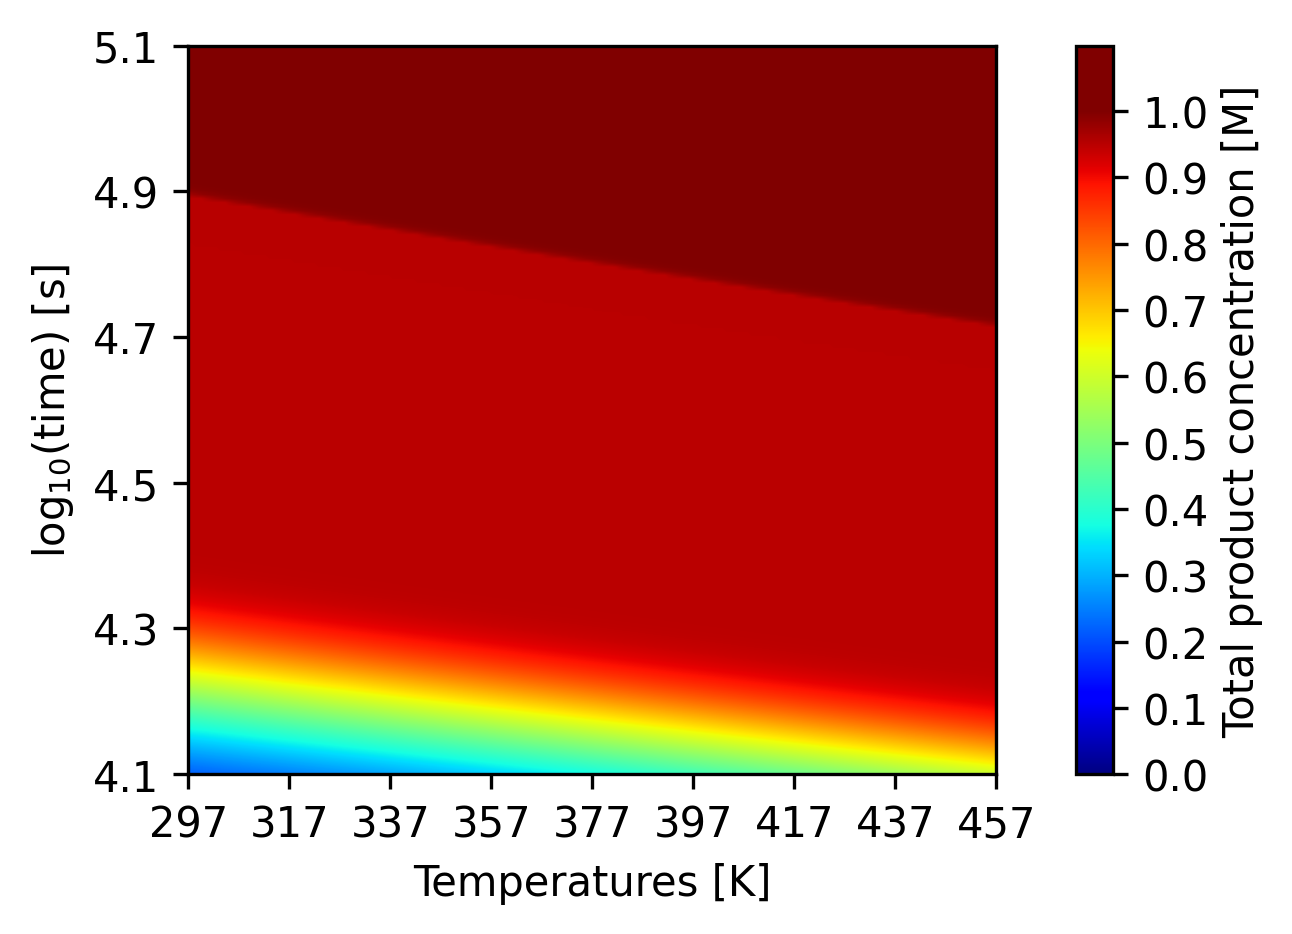

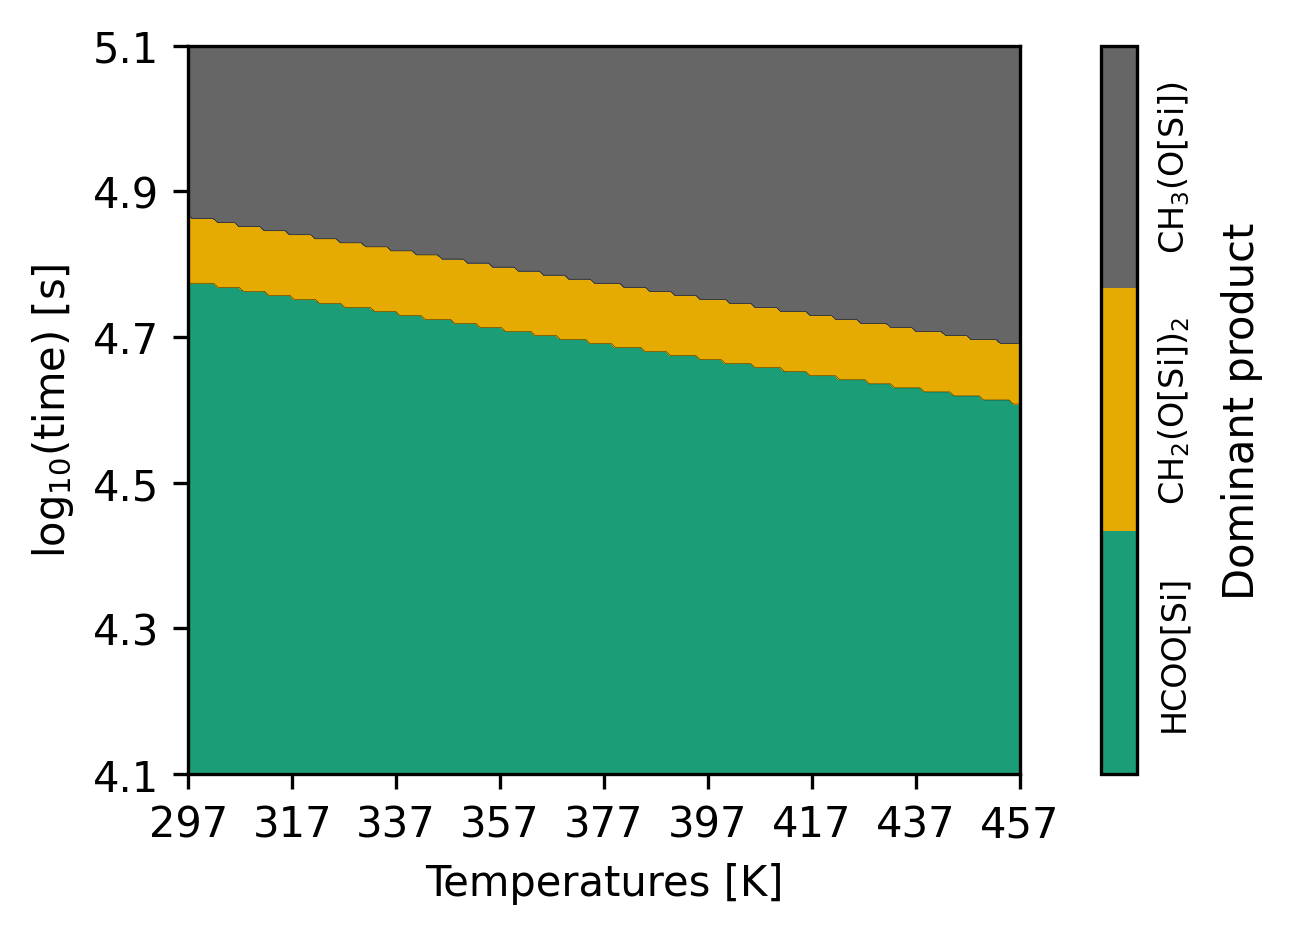

In [5]:
# plot

x1label = "Temperatures [K]"
x2label = "log$_{10}$(time) [s]"
afilename = "Tt_activity_map.png"
sfilename = "Tt_selectivity_map.png"
alabel = "Total product concentration [M]"
slabel = "Dominant product"
x1base = 20
x2base = 0.2
product_id = ["HCOO[Si]","CH$_2$(O[Si])$_2$", "CH$_3$(O[Si])"]


plot_3d_np(
    temperatures_,
    times_,
    agrid,
    0.0,
    1.00,
    temperatures_.min(),
    temperatures_.max(),
    times_.min(),
    times_.max(),
    x1base,
    x2base,
    x1label=x1label,
    x2label=x2label,
    ylabel=alabel,
    filename=afilename,
    cmap="jet"
)

plot_3d_contour_regions_np(
    temperatures_,
    times_,
    sgrid,
    temperatures_.min(),
    temperatures_.max(),
    times_.min(),
    times_.max(),
    x1base,
    x2base,
    x1label=x1label,
    x2label=x2label,
    ylabel=slabel,
    filename=sfilename,
    id_labels=product_id,
    nunique=len(product_id)
)

### Figure 6 Replot activity and selectivity map with Ha and temperature as descriptors

- Catalytic hydrosilylation of CO$_2$ with metal pincer complexes

In [6]:

# read h5 files 
filename = "data/pincer_co2/data_tv.h5"
with h5py.File(filename, 'r') as f:
    group = f['data']
    xint = group['xint'][:]
    t_points = group['t_points'][:]
    grid_d = group['grid'][:]
    tag = group['tag'][:]
    x1label = group['x1label'][:]
    x2label = group['x2label'][:]

/tmp/ipykernel_388/1380354244.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap(cmap, len(levels)),
/tmp/ipykernel_388/1380354244.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("Dark2", nunique + 1),


<Axes: xlabel='Ha [kcal/mol]', ylabel='Temperature [K]'>

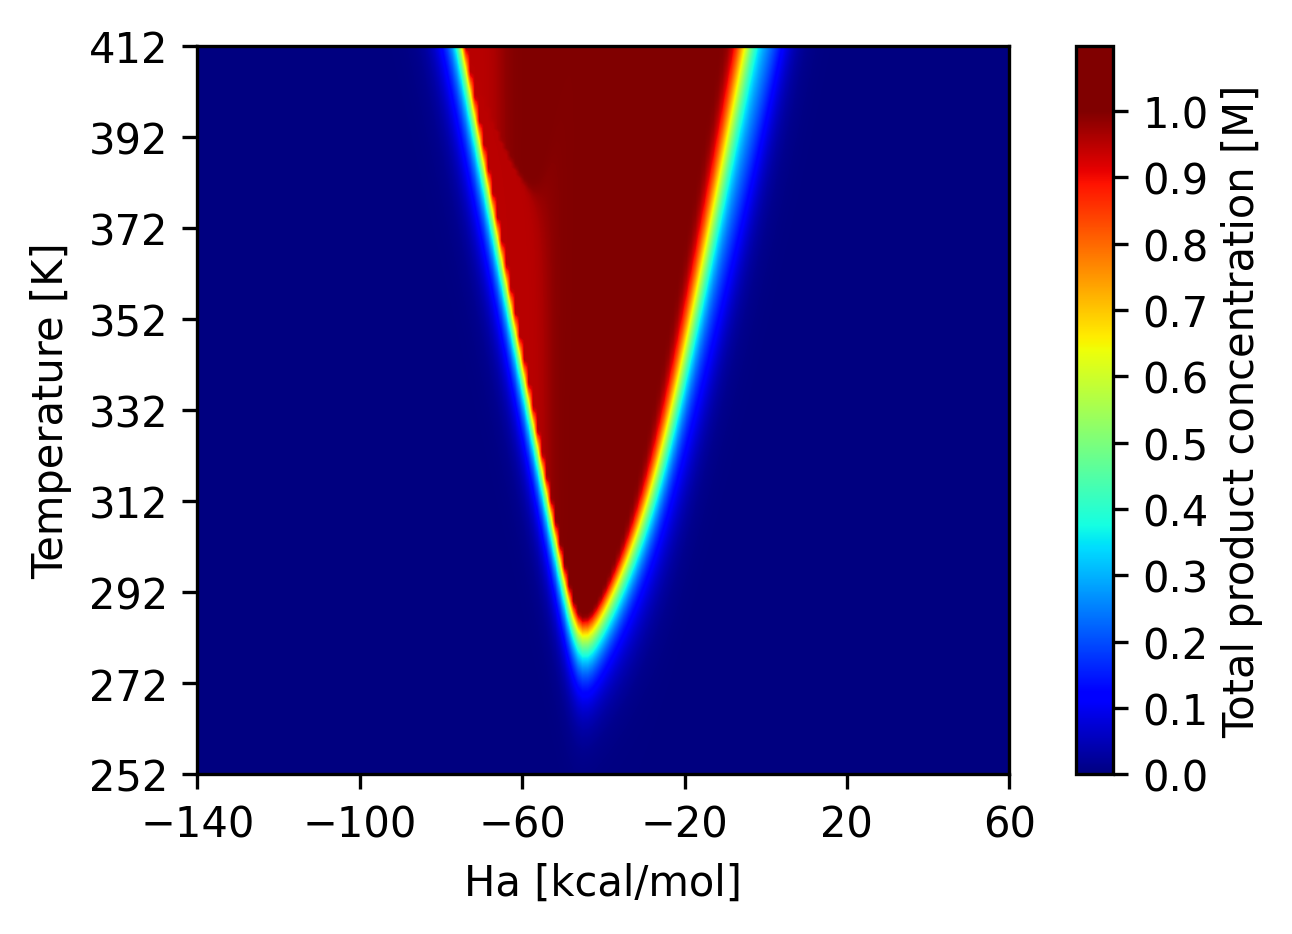

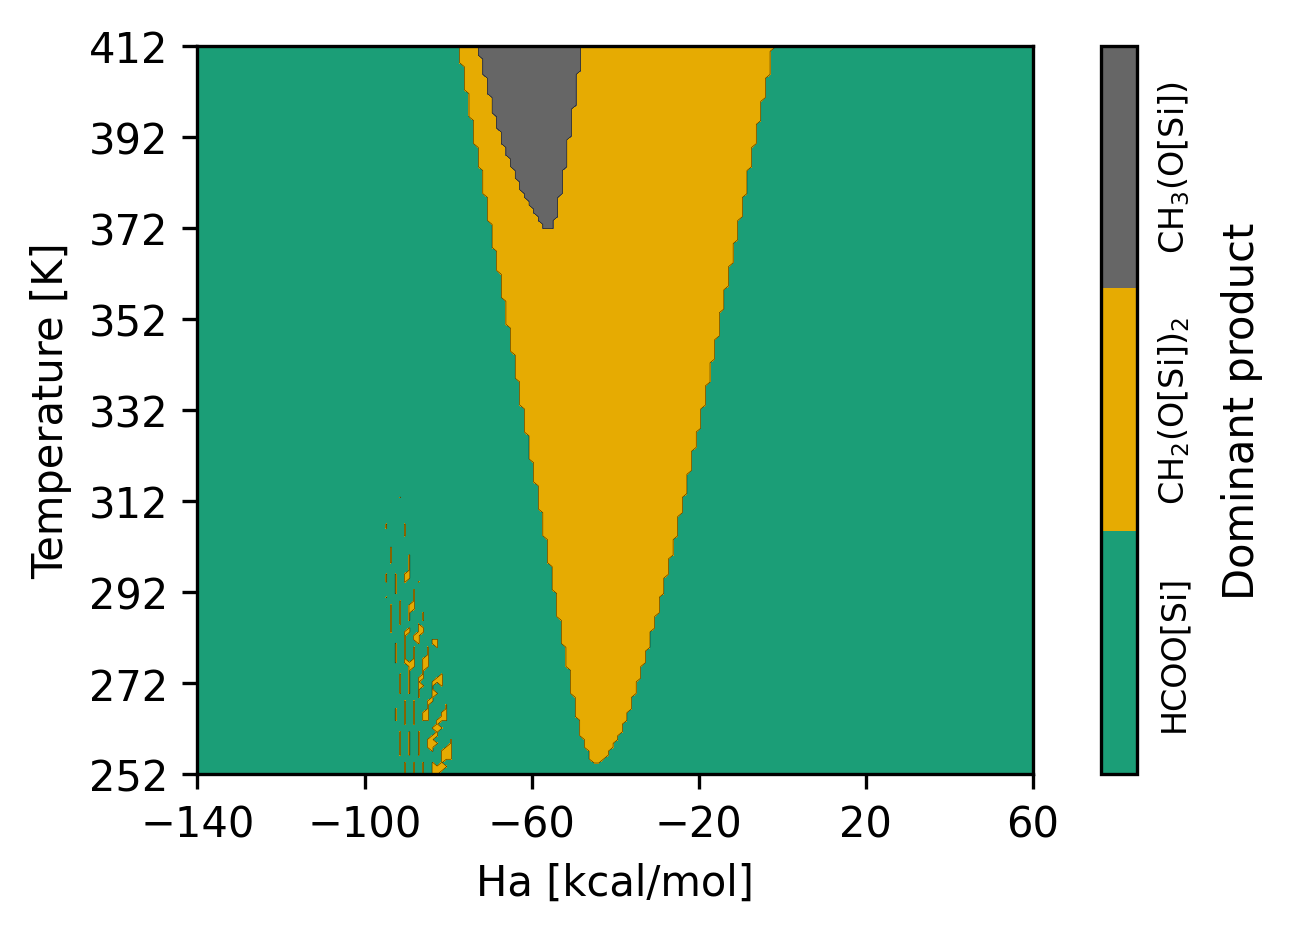

In [7]:
x1label = "Ha [kcal/mol]"
x2label = "Temperature [K]"
alabel = "Total product concentration [M]"
slabel = "Dominant product"
afilename = "HaT_activity_map.png"
sfilename = "HaT_selectivity_map.png"
product_id = ["HCOO[Si]","CH$_2$(O[Si])$_2$", "CH$_3$(O[Si])"]
x1base=40
x2base=20

activity_grid = np.sum(grid_d, axis=0).T
selectivity_grid = np.argmax(grid_d, axis=0).T

plot_3d_np(
    xint,
    t_points,
    activity_grid,
    activity_grid.min(),
    1,
    -140,
    60,
    t_points.min(),
    t_points.max(),
    x1base=x1base,
    x2base=x2base,
    x1label=x1label,
    x2label=x2label,
    ylabel=alabel,
    filename=afilename,
    cmap="jet",
)

plot_3d_contour_regions_np(
    xint,
    t_points,
    selectivity_grid,
    -140,
    60,
    t_points.min(),
    t_points.max(),
    x1base=x1base,
    x2base=x2base,
    x1label=x1label,
    x2label=x2label,
    ylabel=slabel,
    filename=sfilename,
    id_labels=product_id,
    nunique=len(product_id),
)


- 2D volcano plots

<Axes: xlabel='Ha [kcal/mol]', ylabel='Final product concentraion (M)'>

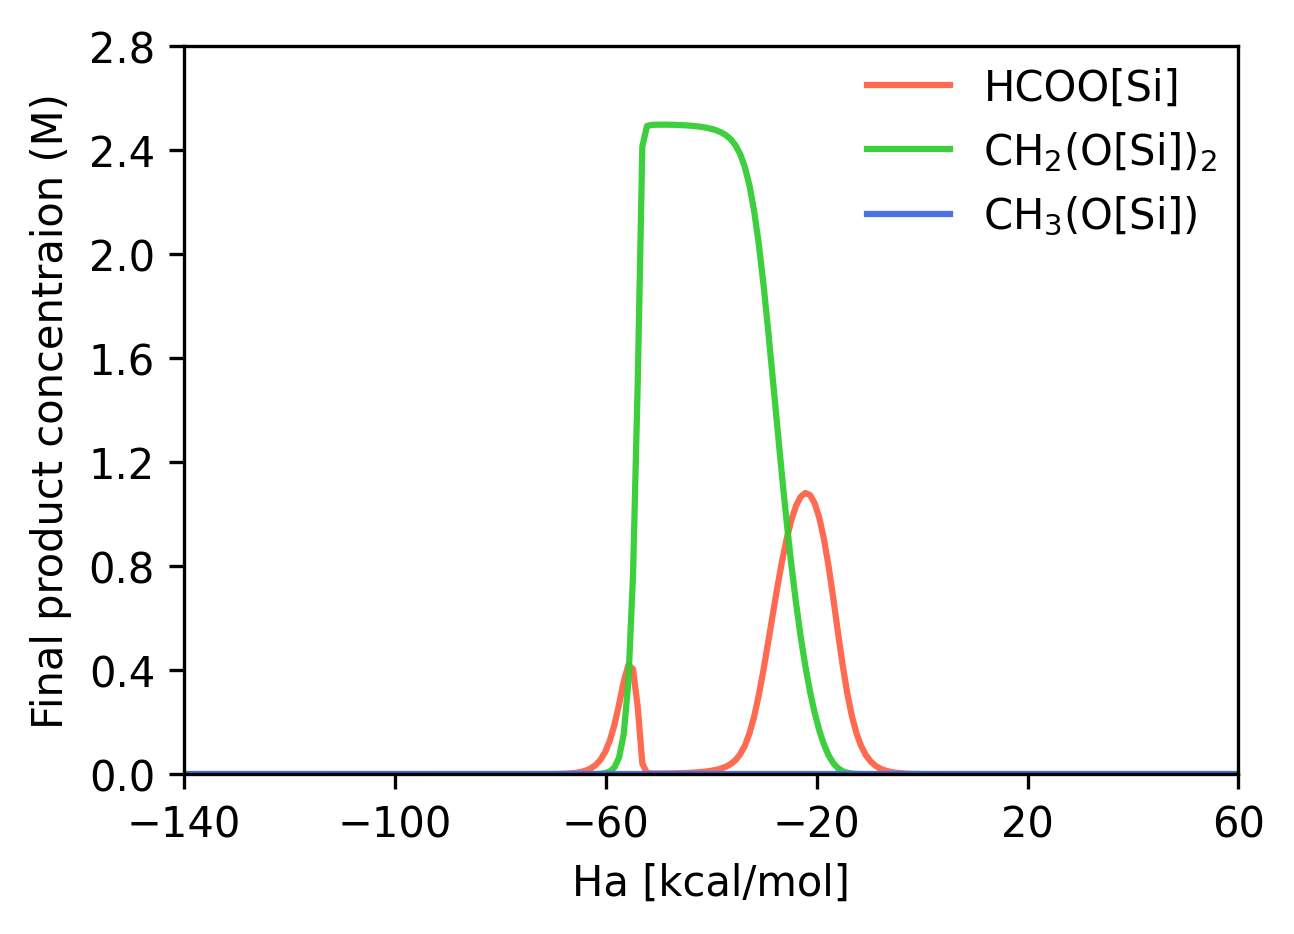

In [8]:

filename = "data/pincer_co2/vp/data_b.h5"
# read h5 files 
with h5py.File(filename, 'r') as f:
    # access the group containing the datasets
    group = f['data']
    # load each dataset into a numpy array
    descr_all = group['descr_all'][:]
    prod_conc_ = group['prod_conc_'][:]
    descrp_pt = group['descrp_pt'][:]
    prod_conc_pt_ = group['prod_conc_pt_'][:]
    cb = group['cb'][:]
    ms = group['ms'][:]
    cb = np.char.decode(cb)
    ms = np.char.decode(ms)
    tag = group['tag'][:]
    xlabel = group['xlabel'][:]
    ylabel = group['ylabel'][:]
    
xlabel = "Ha [kcal/mol]"
ylabel = ylabel[0].decode()
tag = tag[0].decode()

if np.any(np.max(prod_conc_pt_) > 10):
    print("Concentration likely reported as %yield, set y_base to 10")
    ybase = np.round((np.max(prod_conc_pt_) - 0) / 8)
    if ybase == 0: ybase = 5
    ylabel = "%yield"
else:
    ybase = np.round((np.max(prod_conc_pt_) - 0) / 8, 1)
    if ybase == 0: ybase = 0.05
    ylabel = "Final product concentraion (M)"

xbase = np.round((np.max(descr_all) - np.min(descr_all)) / 8)
if xbase == 0: xbase = 5

product_id = ['HCOO[Si]', 'CH$_2$(O[Si])$_2$', 'CH$_3$(O[Si])']

plot_2d_combo(
    descr_all,
    prod_conc_,
    descrp_pt,
    prod_conc_pt_,
    # xmin=descr_all[0],
    # xmax=descr_all[-1],
    xmin=-140,
    xmax=60,
    ms=ms,
    xbase=40,
    ybase=0.4,
    xlabel=xlabel,
    ylabel=ylabel,
    filename=f"km_volcano_{tag}_combo_polished.png",
    plotmode=0,
    labels=product_id,
    ci=[None]*3)

